After conducting my research, I opted to incorporate additional metrics that could potentially influence the solar industry. I included variables such as interest rates, electricity rates, and prices for crude oil, natural gas, and coal. I focused on two key markets where our companies operate: the USA and Europe.

Regarding electricity prices, the available data was provided separately for each country. In Europe, I selected the four main markets where our companies sell their products: the Netherlands, Germany, Italy, and the United Kingdom. I compiled datasets encompassing all these metrics for further analysis.

Let's download the dataset that we've built and analyze it to assess its influence on stock prices. Then, we'll build a random forest model to predict whether the stock price will increase, decrease, or remain the same based on our features.

In [20]:
import pandas as pd
df = pd.read_csv(r'/Users/admin/Desktop/python/final_project/data/merged_data.csv')
df

,Date,US_Interest_Rate,EU_Interest_Rate,US_Electricity_Price,Electricity_Price_Germany_EUR/MWh,Electricity_Price_Netherlands_EUR/MWh,Electricity_Price_Italy_EUR/MWh,Electricity_Price_UK_GBP/MWh,US_Crude_Oil_Price_USD/barrel,US_Natural_Gas_Price_USD/mBtu,...,Sedg_mean_close,Enph_mean_close,Spwr_mean_close,Fslr_mean_close,Quarter,Revenue_sedg,Gross_profit_sedg,Gross_margin_sedg,Operating_income_sedg,Net_income_sedg
0,1.1.2017,0.65,-0.4,0.134,52.372957,50.765282,58.969758,52.855793,52.50,3.30,...,13.442500,1.473500,4.584152,33.565000,Q1 -17,NaN,NaN,NaN,NaN,NaN
1,1.2.2017,0.66,-0.4,0.135,39.701607,43.062321,51.661265,49.185402,53.47,2.85,...,13.894737,1.596842,4.984318,34.016316,Q1 -17,NaN,NaN,NaN,NaN,NaN
2,1.3.2017,0.79,-0.4,0.134,31.701386,34.527927,43.055747,41.921050,49.33,2.88,...,14.354348,1.322174,4.542581,31.113913,Q1 -17,NaN,NaN,NaN,NaN,NaN
3,1.4.2017,0.90,-0.4,0.135,28.869917,35.365444,42.022514,41.070333,51.06,3.10,...,15.855263,1.292105,4.347706,27.445789,Q2 -17,NaN,NaN,NaN,NaN,NaN
4,1.5.2017,0.91,-0.4,0.137,30.460511,35.062124,43.046304,41.106720,48.48,3.15,...,17.470454,0.905000,4.861285,35.814545,Q2 -17,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1.10.2023,5.33,4.0,0.169,86.882940,90.244201,134.063450,125.039458,85.64,2.98,...,106.913636,110.130909,5.184545,149.748636,Q4 -23,NaN,NaN,NaN,NaN,NaN
82,1.11.2023,5.33,4.0,0.168,90.587955,94.406917,118.970736,122.896458,77.69,2.71,...,76.020476,88.871905,4.223810,149.416666,Q4 -23,NaN,NaN,NaN,NaN,NaN
83,1.12.2023,5.33,4.0,0.169,69.918280,73.188427,114.929906,89.065296,71.90,2.52,...,89.326001,119.628000,4.898500,160.153499,Q4 -23,NaN,NaN,NaN,NaN,NaN
84,1.1.2024,5.33,4.0,0.170,75.777013,78.363750,98.398683,99.520306,76.50,2.74,...,74.698095,111.683810,3.516191,155.739048,Q1-24,NaN,NaN,NaN,NaN,NaN


In [21]:
df.shape

(86, 24)

Transform to date type

In [22]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df.dtypes

Date                                     datetime64[ns]
US_Interest_Rate                                float64
EU_Interest_Rate                                float64
US_Electricity_Price                            float64
Electricity_Price_Germany_EUR/MWh               float64
Electricity_Price_Netherlands_EUR/MWh           float64
Electricity_Price_Italy_EUR/MWh                 float64
Electricity_Price_UK_GBP/MWh                    float64
US_Crude_Oil_Price_USD/barrel                   float64
US_Natural_Gas_Price_USD/mBtu                   float64
US_Coal_Price_USD/mBtu                          float64
EU_Crude_Oil_Price                              float64
EU_Natural_Gas_Price                            float64
EU_Coal_Price                                   float64
Sedg_mean_close                                 float64
Enph_mean_close                                 float64
Spwr_mean_close                                 float64
Fslr_mean_close                                 

Data Cleaning:

In [23]:
missing_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])
print("\nNumber of Duplicated Rows:", duplicated_rows)

Missing Values:
Electricity_Price_Germany_EUR/MWh     3
Electricity_Price_UK_GBP/MWh          1
Revenue_sedg                         20
Gross_profit_sedg                    20
Gross_margin_sedg                    20
Operating_income_sedg                20
Net_income_sedg                      20
dtype: int64

Number of Duplicated Rows: 0


The reason for missing values in columns from financial statements - is that we have public access to reports starting from the second quarter of 2018, and the third quarter of 2023 has not yet been published.

In [24]:
# Calculate mean or median
mean_germany = df['Electricity_Price_Germany_EUR/MWh'].mean()
mean_uk = df['Electricity_Price_UK_GBP/MWh'].mean()

# Impute missing values with mean
df['Electricity_Price_Germany_EUR/MWh'].fillna(mean_germany, inplace=True)
df['Electricity_Price_UK_GBP/MWh'].fillna(mean_uk, inplace=True)


In [25]:
missing_values = df.isnull().sum() #check
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Revenue_sedg             20
Gross_profit_sedg        20
Gross_margin_sedg        20
Operating_income_sedg    20
Net_income_sedg          20
dtype: int64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   86 non-null     datetime64[ns]
 1   US_Interest_Rate                       86 non-null     float64       
 2   EU_Interest_Rate                       86 non-null     float64       
 3   US_Electricity_Price                   86 non-null     float64       
 4   Electricity_Price_Germany_EUR/MWh      86 non-null     float64       
 5   Electricity_Price_Netherlands_EUR/MWh  86 non-null     float64       
 6   Electricity_Price_Italy_EUR/MWh        86 non-null     float64       
 7   Electricity_Price_UK_GBP/MWh           86 non-null     float64       
 8   US_Crude_Oil_Price_USD/barrel          86 non-null     float64       
 9   US_Natural_Gas_Price_USD/mBtu          86 non-null     float64     

In [27]:
df.describe()

,Date,US_Interest_Rate,EU_Interest_Rate,US_Electricity_Price,Electricity_Price_Germany_EUR/MWh,Electricity_Price_Netherlands_EUR/MWh,Electricity_Price_Italy_EUR/MWh,Electricity_Price_UK_GBP/MWh,US_Crude_Oil_Price_USD/barrel,US_Natural_Gas_Price_USD/mBtu,...,EU_Coal_Price,Sedg_mean_close,Enph_mean_close,Spwr_mean_close,Fslr_mean_close,Revenue_sedg,Gross_profit_sedg,Gross_margin_sedg,Operating_income_sedg,Net_income_sedg
count,86,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2020-07-16 12:00:00,1.820000,0.253435,0.145326,83.113161,86.085972,105.674301,93.432483,64.933953,3.355000,...,115.981509,153.325539,93.999590,11.788950,85.974143,515769.318182,155206.818182,0.310000,49191.272727,38167.227273
min,2017-01-01 00:00:00,0.050000,-0.500000,0.133000,17.880880,17.648427,22.538871,22.167433,16.550000,1.630000,...,50.164268,13.442500,0.815909,3.516191,27.445789,227118.000000,77982.000000,0.200000,-16726.000000,-61176.000000
25%,2018-10-08 18:00:00,0.100000,-0.500000,0.136000,34.288786,38.992597,49.341045,43.429124,52.125000,2.552500,...,60.855251,44.170461,5.515238,4.901929,52.675844,331851.000000,108063.000000,0.290000,29965.000000,20829.000000
50%,2020-07-16 12:00:00,1.530000,-0.400000,0.139000,49.994062,52.555551,60.232416,59.073592,63.215000,2.840000,...,91.827057,105.205389,64.243377,6.264984,69.485325,424720.500000,141445.500000,0.320000,42583.000000,35618.000000
75%,2022-04-23 12:00:00,2.400000,-0.400000,0.153250,93.888194,93.800625,120.130920,124.492904,76.485000,3.592500,...,121.699806,275.535952,171.147500,18.306774,101.347281,725305.000000,178958.000000,0.330000,66017.000000,45092.000000
max,2024-02-01 00:00:00,5.330000,4.000000,0.171000,461.397577,447.057097,539.896156,432.533250,114.840000,8.800000,...,293.619041,352.901427,306.594761,42.344737,208.667893,991290.000000,317305.000000,0.360000,150358.000000,138378.000000
std,NaN,1.715775,1.462841,0.013186,79.848407,78.731056,95.576339,74.850477,18.450238,1.536865,...,75.682264,113.002198,91.515022,9.227439,47.691798,236785.205418,66685.869770,0.036332,38646.832742,37026.110231


Rename some columns

In [28]:
df.columns

Index(['Date', 'US_Interest_Rate', 'EU_Interest_Rate', 'US_Electricity_Price',
       'Electricity_Price_Germany_EUR/MWh',
       'Electricity_Price_Netherlands_EUR/MWh',
       'Electricity_Price_Italy_EUR/MWh', 'Electricity_Price_UK_GBP/MWh',
       'US_Crude_Oil_Price_USD/barrel', 'US_Natural_Gas_Price_USD/mBtu',
       'US_Coal_Price_USD/mBtu', 'EU_Crude_Oil_Price', 'EU_Natural_Gas_Price',
       'EU_Coal_Price', 'Sedg_mean_close', 'Enph_mean_close',
       'Spwr_mean_close', 'Fslr_mean_close', 'Quarter', 'Revenue_sedg',
       'Gross_profit_sedg', 'Gross_margin_sedg', 'Operating_income_sedg',
       'Net_income_sedg'],
      dtype='object')

In [29]:
# Rename columns in df
df.rename(columns={'Electricity_Price_Germany_EUR/MWh': 'Electricity_Price_Germany', 
                   'Electricity_Price_Netherlands_EUR/MWh': 'Electricity_Price_Netherlands',
                   'Electricity_Price_Italy_EUR/MWh': 'Electricity_Price_Italy',
                   'Electricity_Price_UK_GBP/MWh' : 'Electricity_Price_UK',
                   'US_Crude_Oil_Price_USD/barrel' : 'US_Crude_Oil_Price',
                   'US_Natural_Gas_Price_USD/mBtu':'US_Natural_Gas_Price',
                   'US_Coal_Price_USD/mBtu':'US_Coal_Price'},
          inplace=True)


Interest rate analysis

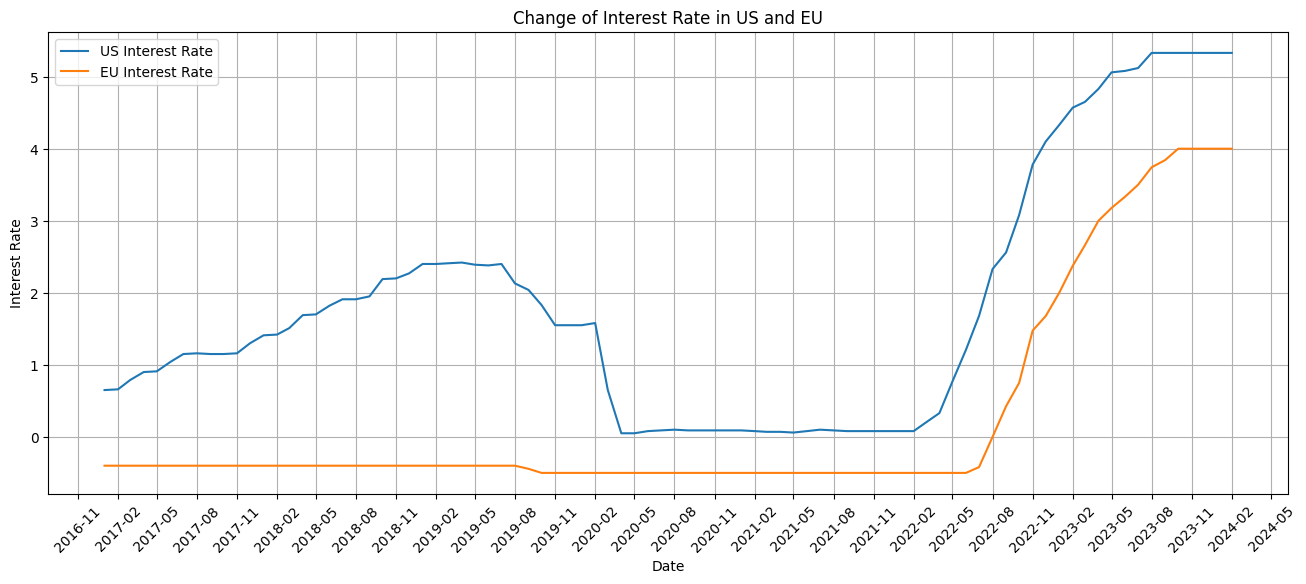

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator

# Set the size of the plot
plt.figure(figsize=(16, 6))

# Plot using Seaborn
sns.lineplot(x='Date', y='US_Interest_Rate', data=df, label='US Interest Rate')
sns.lineplot(x='Date', y='EU_Interest_Rate', data=df, label='EU Interest Rate')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Change of Interest Rate in US and EU')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add months to x-axis labels
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))


# Add grid
plt.grid(True)

# Show legend
plt.legend()

# Show plot
plt.show()


In this plot, we visualize the change in interest rates over time for both the United States (US) and the European Union (EU). We can observe how interest rates in both markets have evolved very similarly. There is a strong positive relationship between interest rates in the US and Europe.
However, it's important to note that the nominal US interest rate is higher than that of the EU.

Electricity prices in USA and Europe

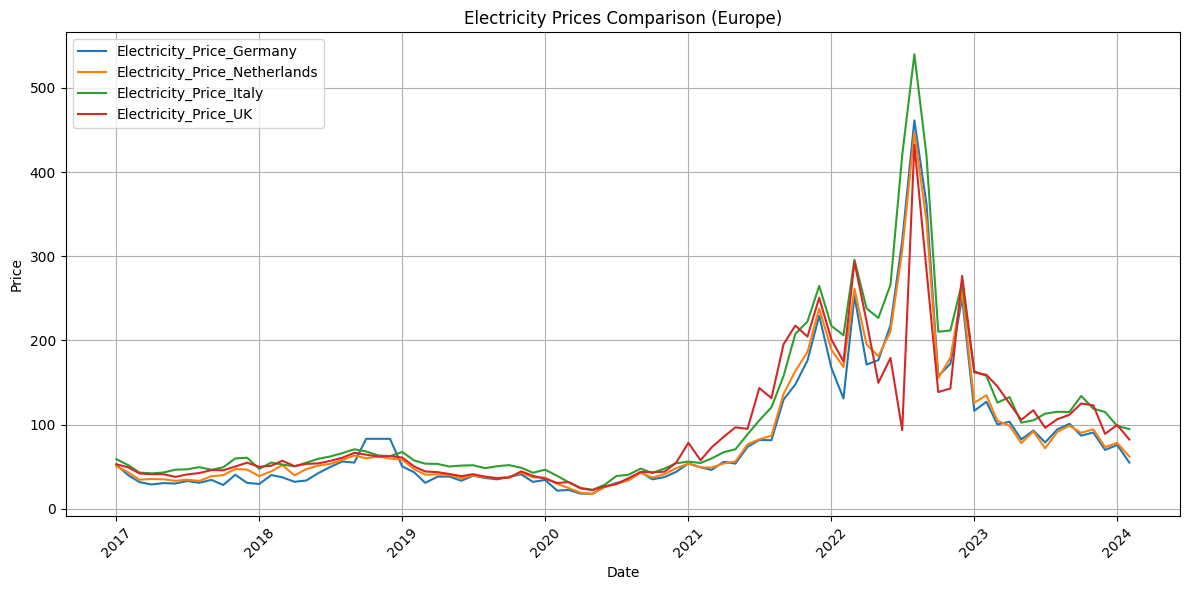

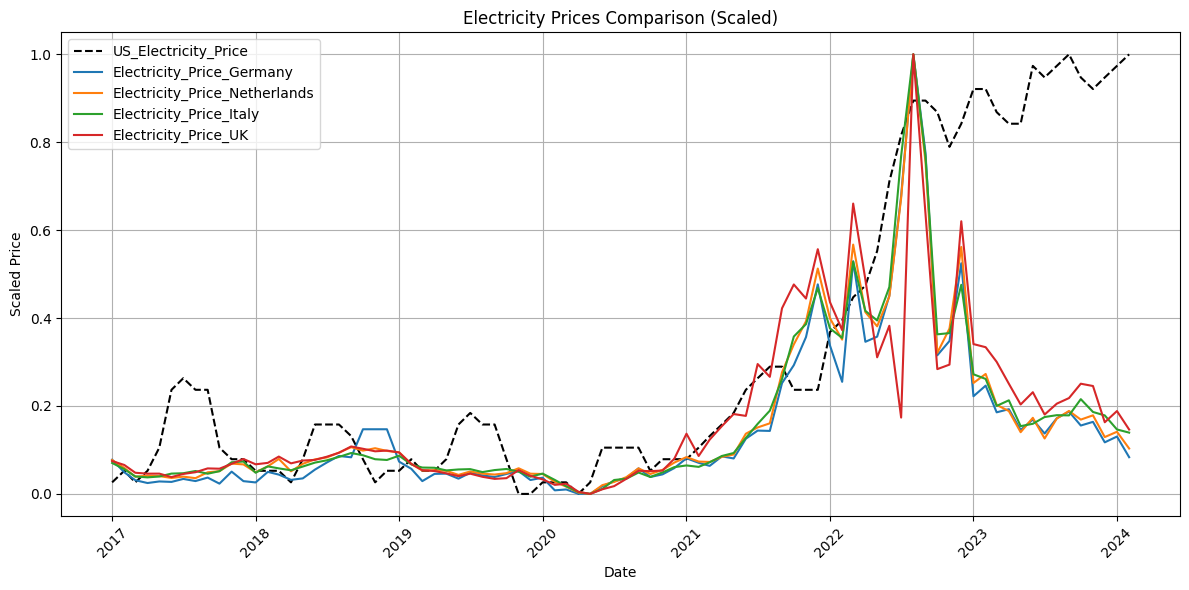

In [31]:
from sklearn.preprocessing import MinMaxScaler
# Select electricity price columns for Europe
europe_electricity_price_columns = ['Electricity_Price_Germany',
                                     'Electricity_Price_Netherlands',
                                     'Electricity_Price_Italy',
                                     'Electricity_Price_UK']

electricity_price_columns = ['US_Electricity_Price', 'Electricity_Price_Germany',
                             'Electricity_Price_Netherlands', 'Electricity_Price_Italy',
                             'Electricity_Price_UK']

# Scale electricity price columns for Europe using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[electricity_price_columns] = scaler.fit_transform(df[electricity_price_columns])

# Create subplot 1: Electricity prices for Europe
plt.figure(figsize=(12, 6))
for column in europe_electricity_price_columns:
    plt.plot(df['Date'], df[column], label=column)

plt.title('Electricity Prices Comparison (Europe)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Create subplot 2: Scaled electricity prices for all regions
plt.figure(figsize=(12, 6))
for column in electricity_price_columns:
    if column == 'US_Electricity_Price':
        plt.plot(df['Date'], df_scaled[column], label=column, color='black', linestyle='--')
    else:
        plt.plot(df['Date'], df_scaled[column], label=column)

plt.title('Electricity Prices Comparison (Scaled)')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


We can observe that electricity prices in Europe change very closely to one another, almost identically. Up until the first half of 2022, US electricity prices changed in a very similar manner to those in Europe. However, from then until today, we see differences: electricity prices in Europe fell down, while in the US, they continued to grow.

Let's create subplots for each commodity (crude oil, natural gas, and coal) and plot both USA and Europe prices for comparison.

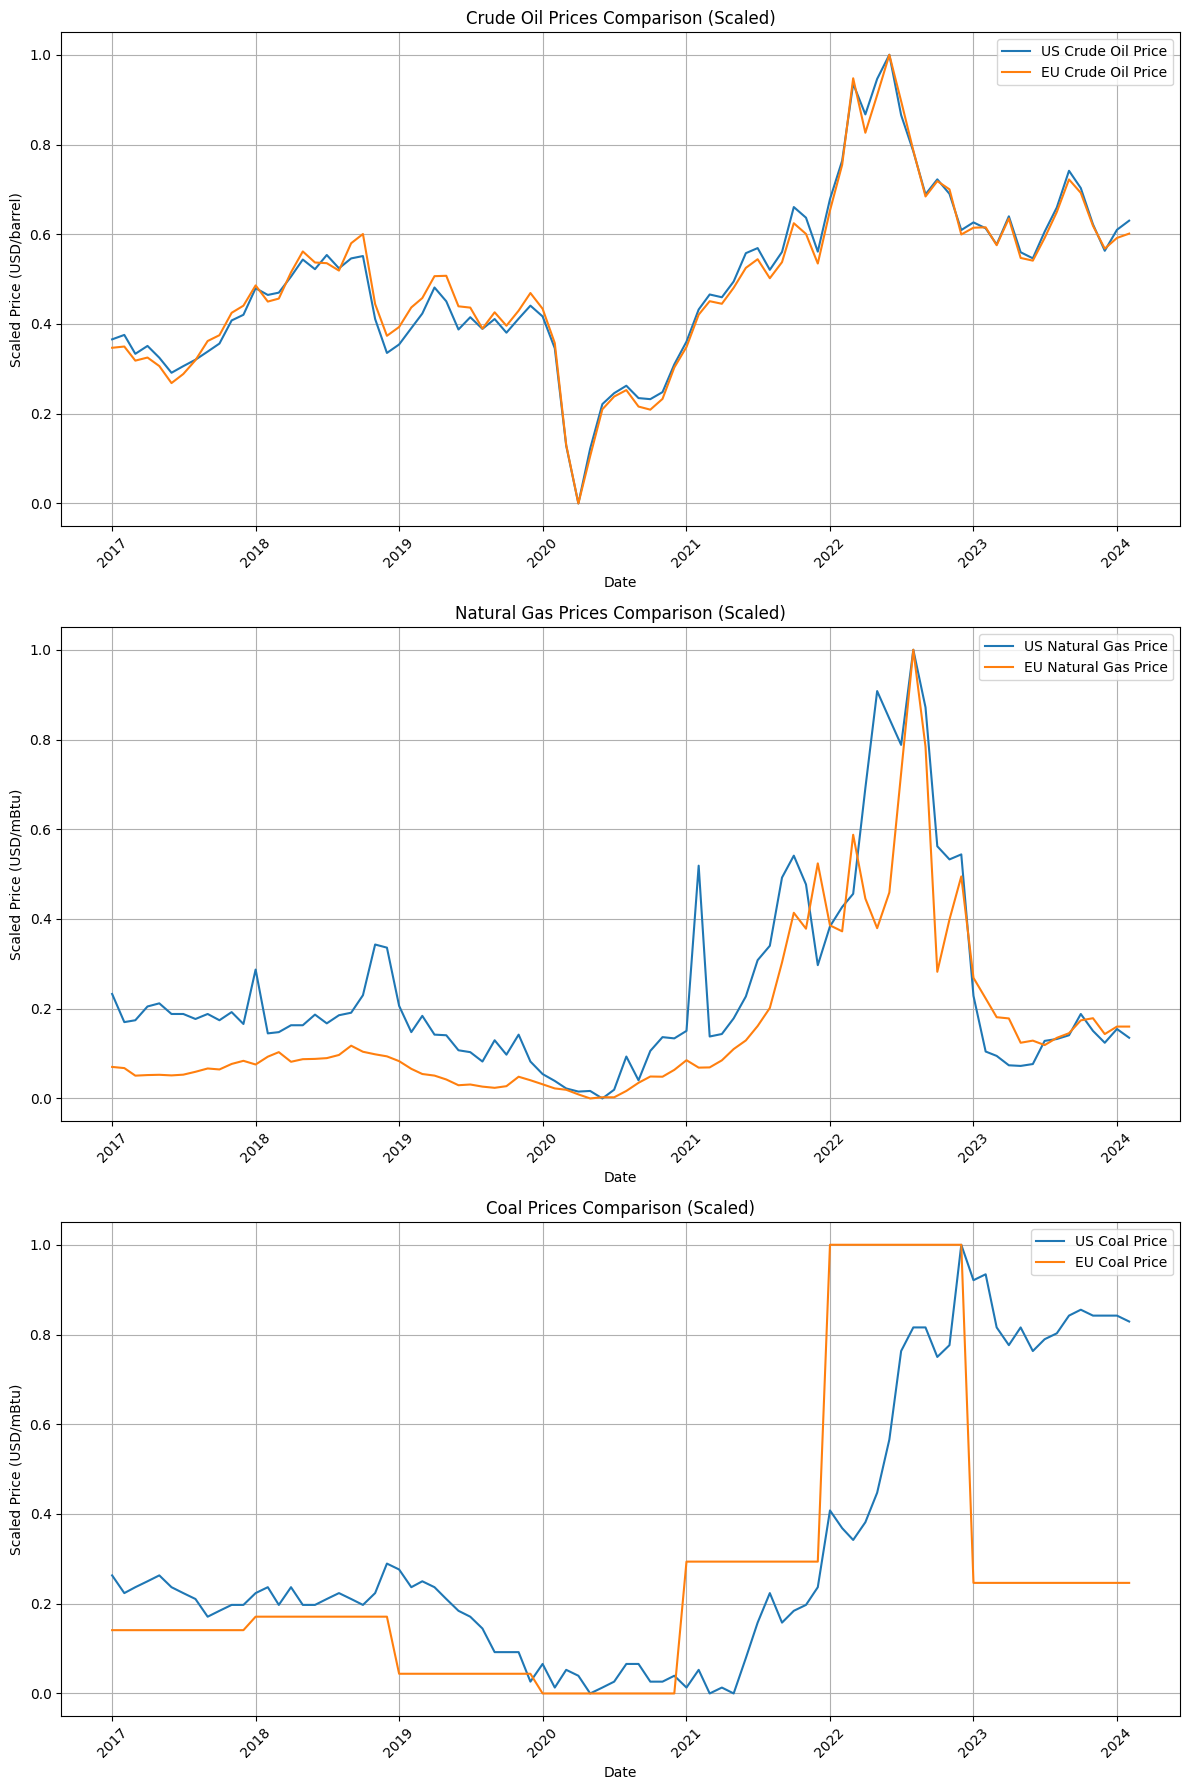

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Select price columns
price_columns = ['US_Crude_Oil_Price', 'EU_Crude_Oil_Price',
                 'US_Natural_Gas_Price', 'EU_Natural_Gas_Price',
                 'US_Coal_Price', 'EU_Coal_Price']

# Scale price columns using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[price_columns] = scaler.fit_transform(df[price_columns])

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Crude oil prices subplot
axes[0].plot(df['Date'], df_scaled['US_Crude_Oil_Price'], label='US Crude Oil Price')
axes[0].plot(df['Date'], df_scaled['EU_Crude_Oil_Price'], label='EU Crude Oil Price')
axes[0].set_title('Crude Oil Prices Comparison (Scaled)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Scaled Price (USD/barrel)')
axes[0].legend()
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Natural gas prices subplot
axes[1].plot(df['Date'], df_scaled['US_Natural_Gas_Price'], label='US Natural Gas Price')
axes[1].plot(df['Date'], df_scaled['EU_Natural_Gas_Price'], label='EU Natural Gas Price')
axes[1].set_title('Natural Gas Prices Comparison (Scaled)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Scaled Price (USD/mBtu)')
axes[1].legend()
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

# Coal prices subplot
axes[2].plot(df['Date'], df_scaled['US_Coal_Price'], label='US Coal Price')
axes[2].plot(df['Date'], df_scaled['EU_Coal_Price'], label='EU Coal Price')
axes[2].set_title('Coal Prices Comparison (Scaled)')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Scaled Price (USD/mBtu)')
axes[2].legend()
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


All of the energy commodity have strong positive correlation between US and Europe, we can see the same trends.
The similar trends in crude oil prices between the United States and Europe can be attributed to the fact that crude oil is a globally traded commodity with a unified price published on stock exchanges worldwide.


Let's examine two heatmaps: one for the entire period and another for just the last year, which we aim to analyze.

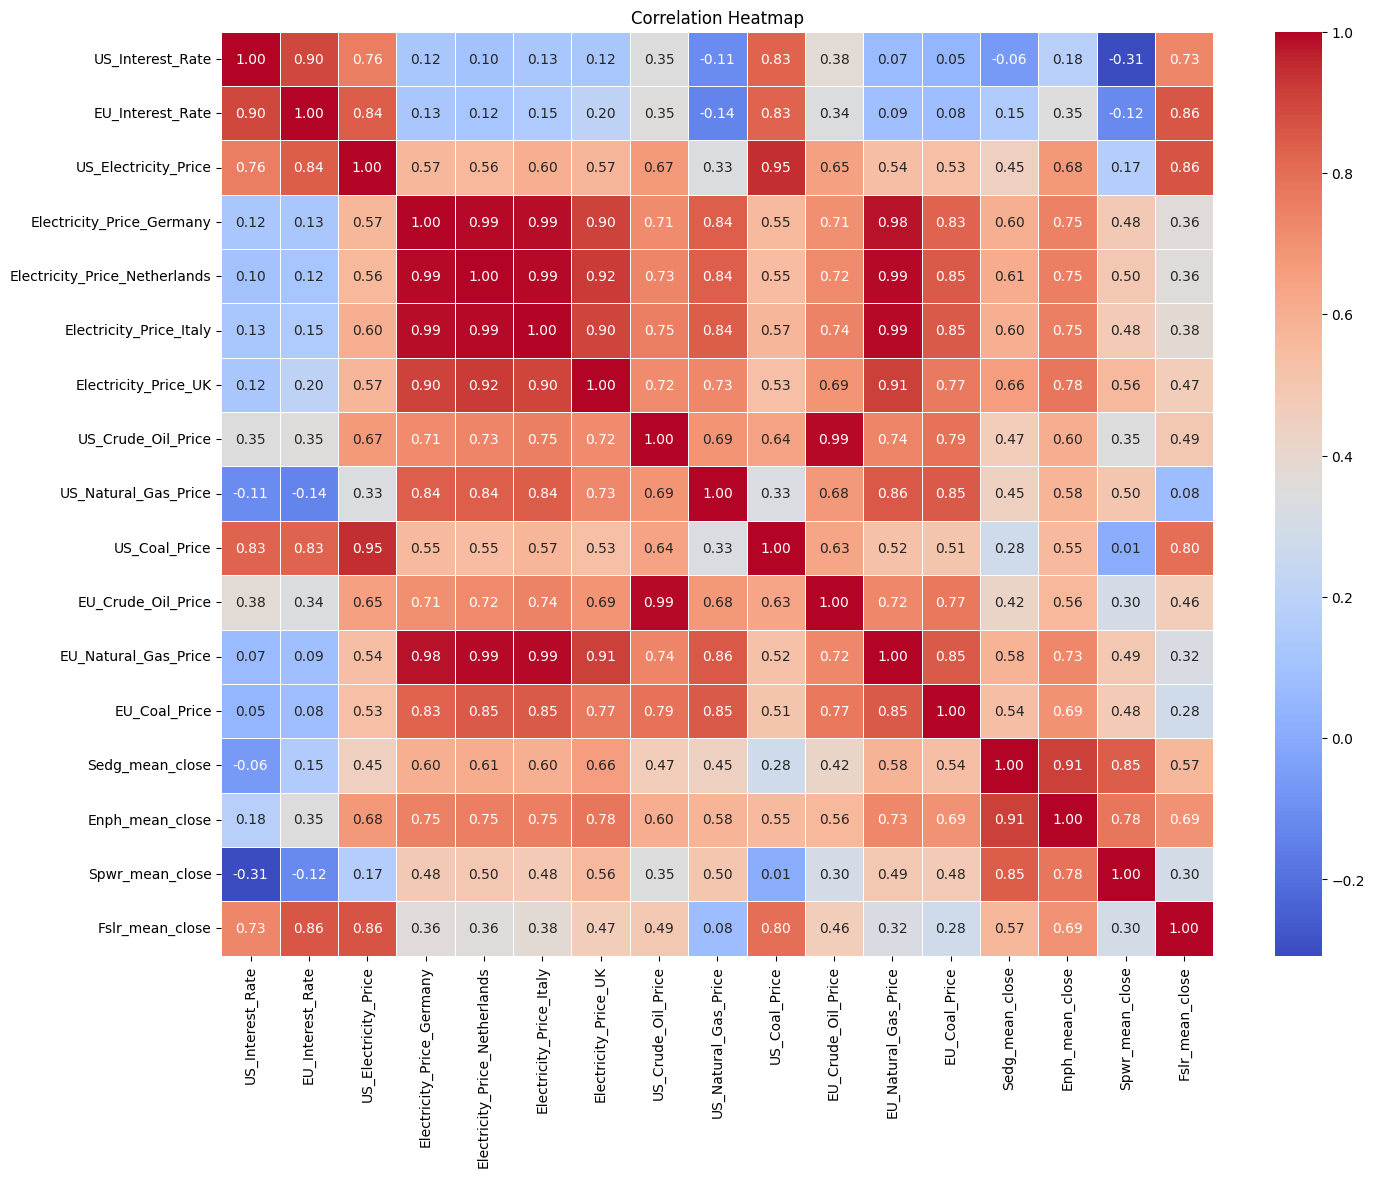

In [33]:
# Compute the correlation matrix
df_numeric = df.drop(columns=['Date', 'Quarter','Revenue_sedg', 'Gross_profit_sedg', 'Gross_margin_sedg',
       'Operating_income_sedg', 'Net_income_sedg'])
corr = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

Firstly, once again, we observe a very high positive correlation among the four companies. We will further explore the indicators, their influence, and their correlation with stock prices in the plots below.

Let's narrow down our analysis to the period from 2023 to 2024. This plot will also help us better understand what happened in the last year.

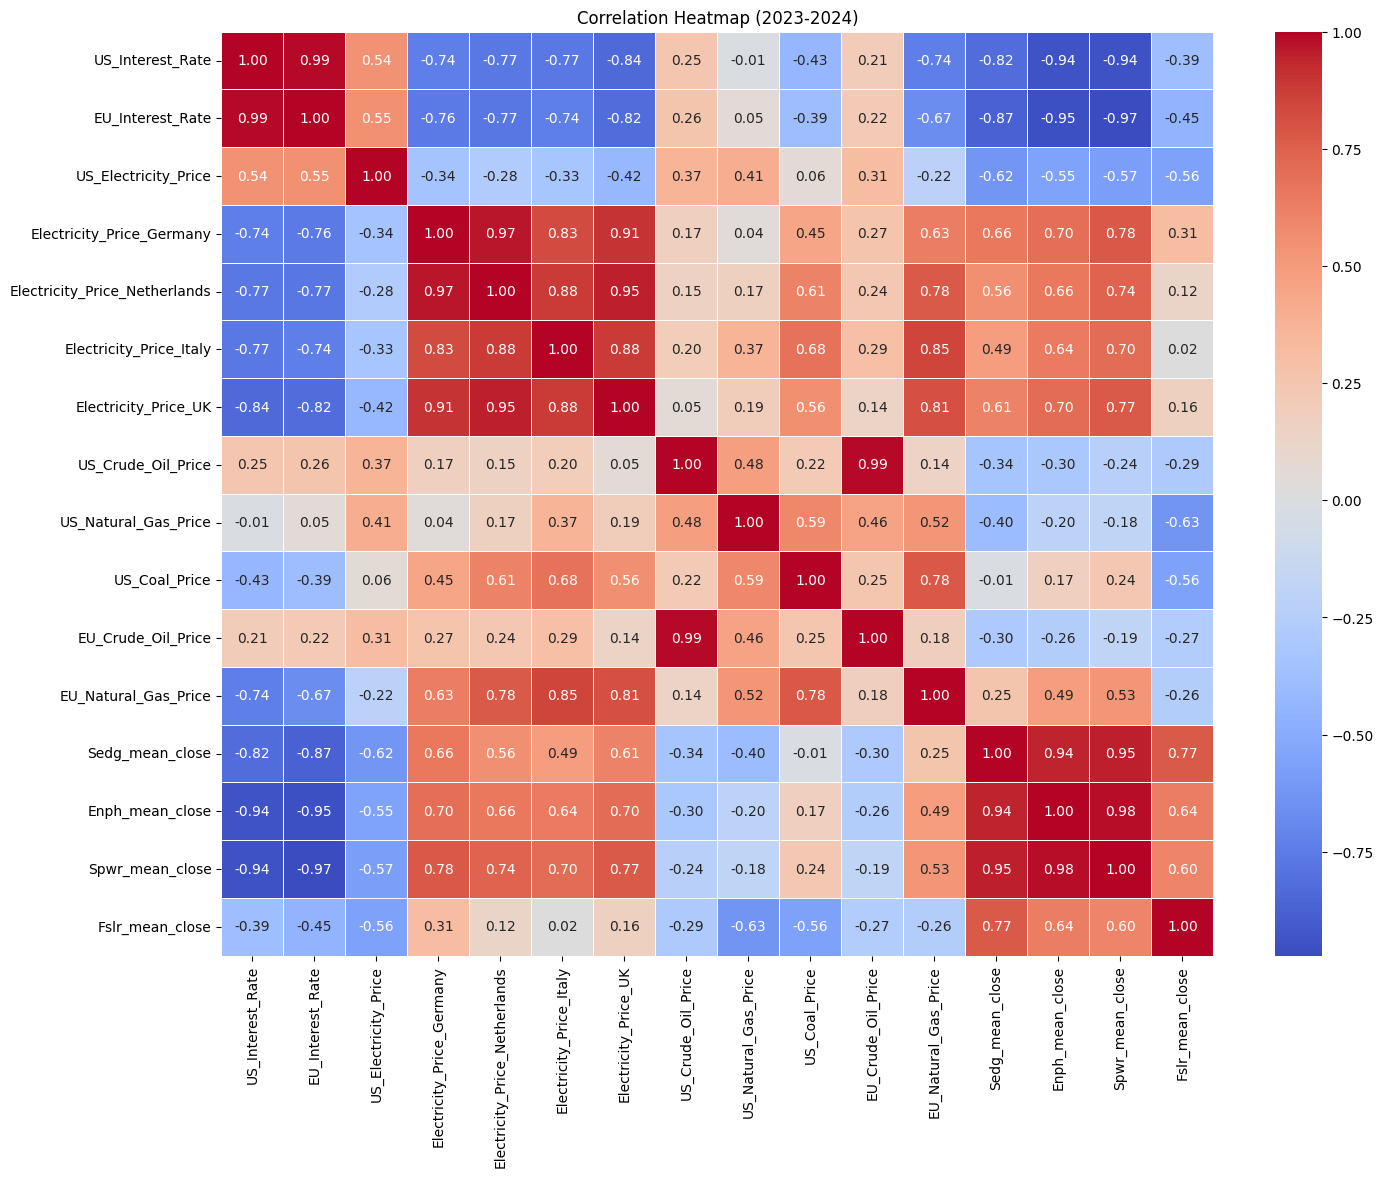

In [34]:
# Filter the DataFrame for the years 2023-2024
df_filtered = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2024-12-31')]

# Move columns with stock prices to the end
stock_price_columns = ['Sedg_mean_close', 'Enph_mean_close', 'Spwr_mean_close', 'Fslr_mean_close']
other_columns = [col for col in df_filtered.columns if col not in stock_price_columns]
column_order = other_columns + stock_price_columns
df_filtered = df_filtered[column_order]

# Compute the correlation matrix for the filtered DataFrame
df_numeric_filtered = df_filtered.drop(columns=['Date', 'EU_Coal_Price', 'Quarter', 'Revenue_sedg', 'Gross_profit_sedg', 'Gross_margin_sedg', 'Operating_income_sedg', 'Net_income_sedg'])
corr_filtered = df_numeric_filtered.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_filtered, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap (2023-2024)')
plt.show()


In [35]:
sns.set()

The Impact of Interest Rates on Stock Prices.

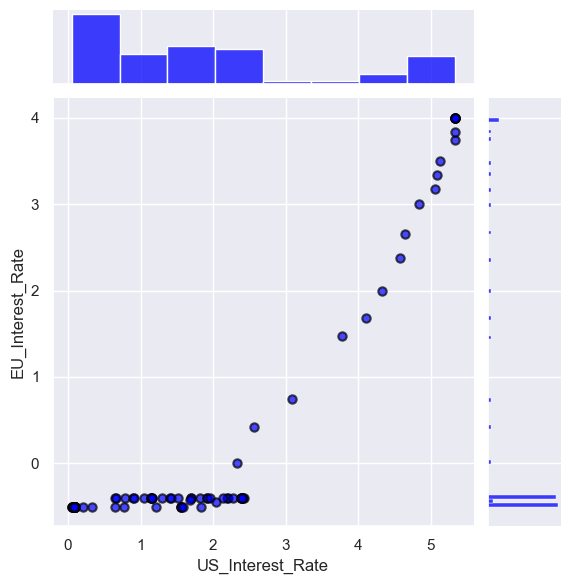

In [36]:
sns.jointplot(x='US_Interest_Rate', y='EU_Interest_Rate', data=df, kind='scatter', 
              color='blue', marker='o', edgecolor='black', linewidth=1.5, alpha=0.7)

Once again, we observe a strong positive correlation between interest rates in the US and the EU.

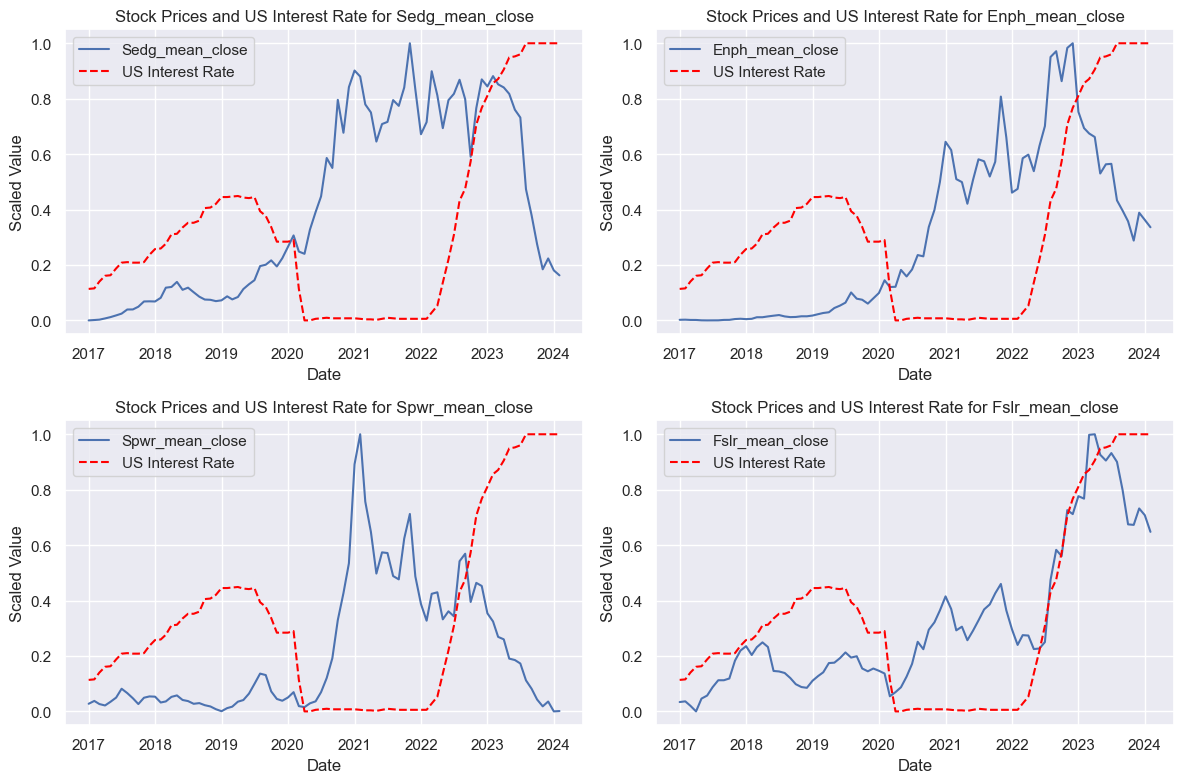

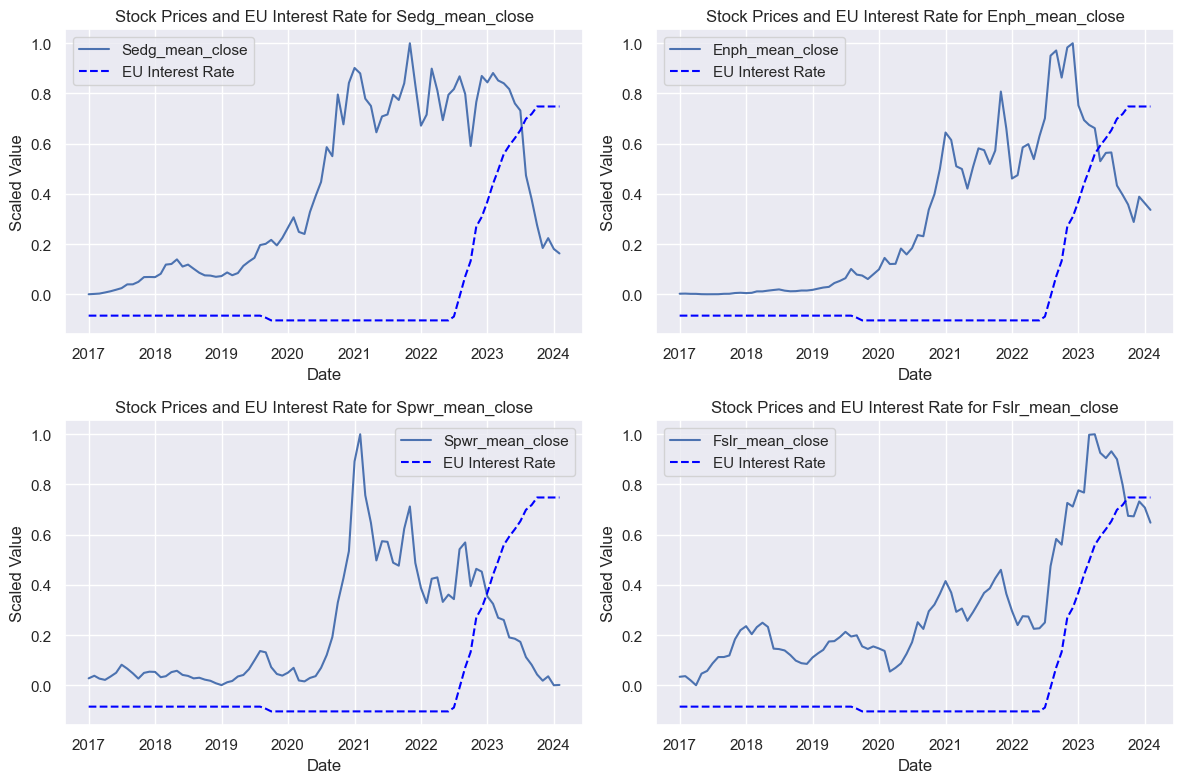

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Extract relevant columns from DataFrame
interest_rate_us = df['US_Interest_Rate']
interest_rate_eu = df['EU_Interest_Rate']
stock_prices = df[['Sedg_mean_close', 'Enph_mean_close', 'Spwr_mean_close', 'Fslr_mean_close']]

# Perform min-max scaling on the data
scaler = MinMaxScaler()
interest_rate_us_scaled = scaler.fit_transform(interest_rate_us.values.reshape(-1, 1)).flatten()
interest_rate_eu_scaled = scaler.transform(interest_rate_eu.values.reshape(-1, 1)).flatten()
stock_prices_scaled = scaler.fit_transform(stock_prices)

# Plot the relationship between US interest rate and stock prices for each company using line plots
plt.figure(figsize=(12, 8))
for i, company in enumerate(stock_prices.columns):
    plt.subplot(2, 2, i+1)
    plt.plot(df['Date'], stock_prices_scaled[:, i], label=company)
    plt.plot(df['Date'], interest_rate_us_scaled, label='US Interest Rate', linestyle='--', color='red')
    plt.title(f'Stock Prices and US Interest Rate for {company}')
    plt.xlabel('Date')
    plt.ylabel('Scaled Value')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot the relationship between EU interest rate and stock prices for each company using line plots
plt.figure(figsize=(12, 8))
for i, company in enumerate(stock_prices.columns):
    plt.subplot(2, 2, i+1)
    plt.plot(df['Date'], stock_prices_scaled[:, i], label=company)
    plt.plot(df['Date'], interest_rate_eu_scaled, label='EU Interest Rate', linestyle='--', color='blue')
    plt.title(f'Stock Prices and EU Interest Rate for {company}')
    plt.xlabel('Date')
    plt.ylabel('Scaled Value')
    plt.legend()

plt.tight_layout()
plt.show()



We can observe an inverse (negativ) relationship between the interest rate and the stock prices. In three companies, SolarEdge,Enphase Energy and SunPower,  we see that when there was a jump in interest rates, shares fell sharply. In the case of the fourth company - First Solar, its stocks reached their peak later compared to others. This coincided with the rise in interest rates, leading to the observation of a positive correlation throughout all years, and not as strong a correlation as other companies in 2023. However, when the interest rate reached its maximum, the shares of First Solar also fell.
Overall, we see the strongest negative correlation (-0.82 - -0.97) between rising interest rates and falling stock prices.

Let's explore the electricity prices of different countries, their mutual influence, and their impact on stock prices.

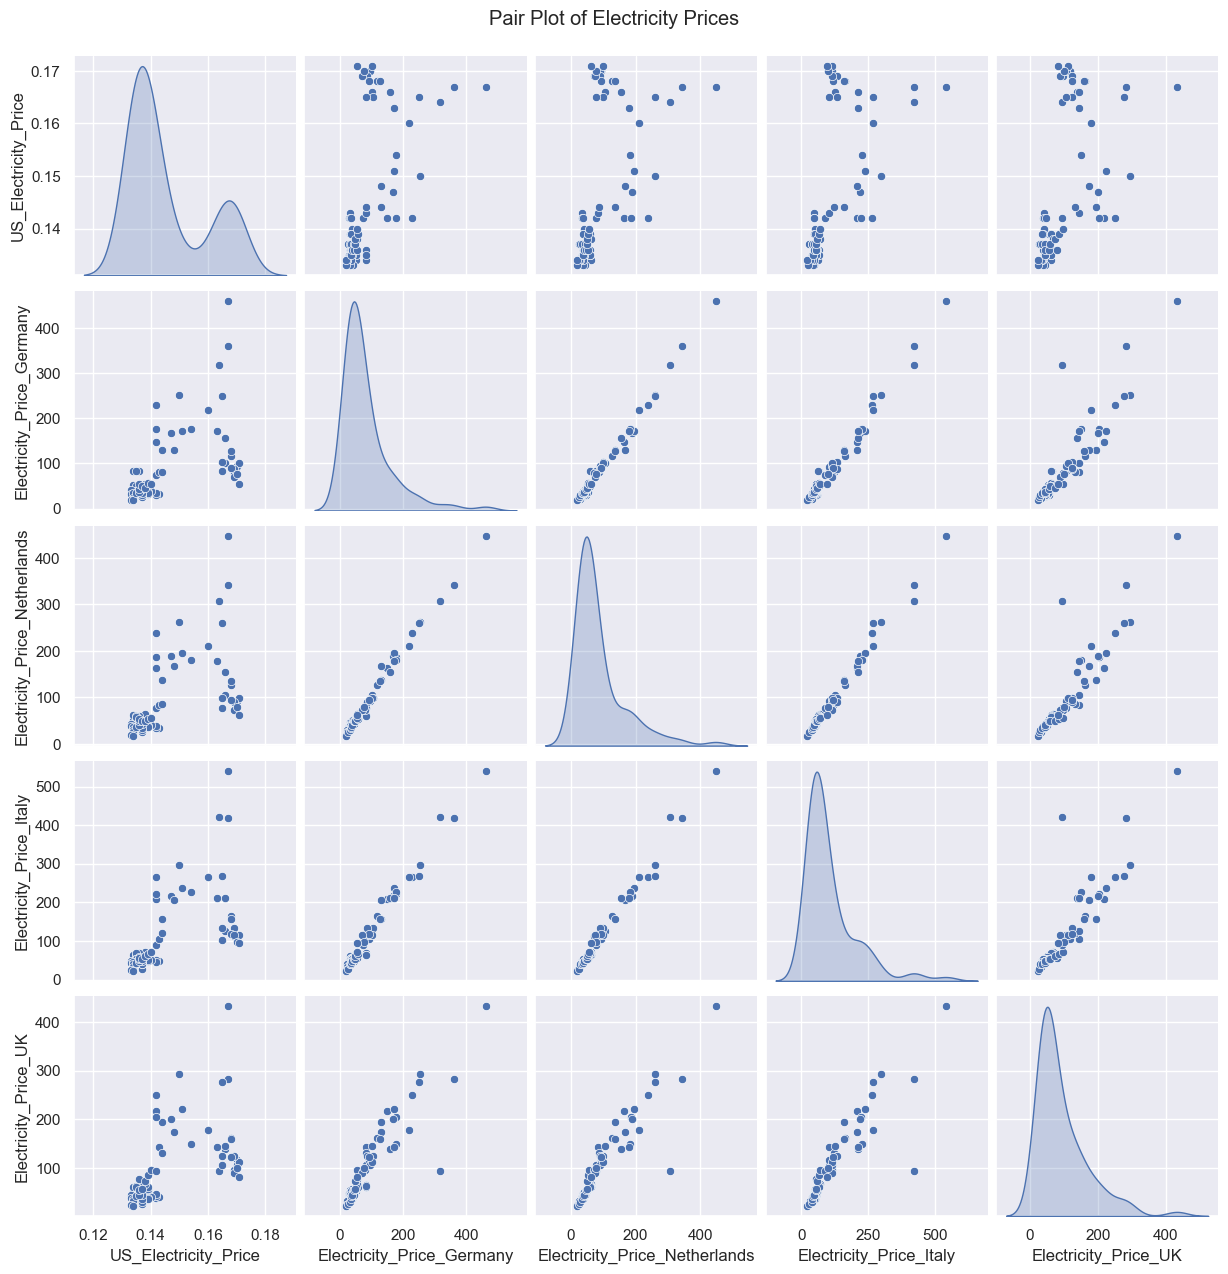

In [38]:
# Select subsets of columns
electricity_prices_columns = ['US_Electricity_Price', 'Electricity_Price_Germany',
                              'Electricity_Price_Netherlands', 'Electricity_Price_Italy',
                              'Electricity_Price_UK']

# Pair plot for electricity prices
sns.pairplot(df[electricity_prices_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Electricity Prices', y=1.02)
# Customize axis labels
plt.xlabel('Electricity Price')
plt.ylabel('Electricity Price')
plt.show()


We can observe that electricity prices in Europe are distributed very similarly, as depicted in the kernel density estimation (kde) plots along the diagonal, as well as in each scatter plot within the grid. Additionally, there appears to be a positive relationship between electricity prices in Europe and those in the USA.

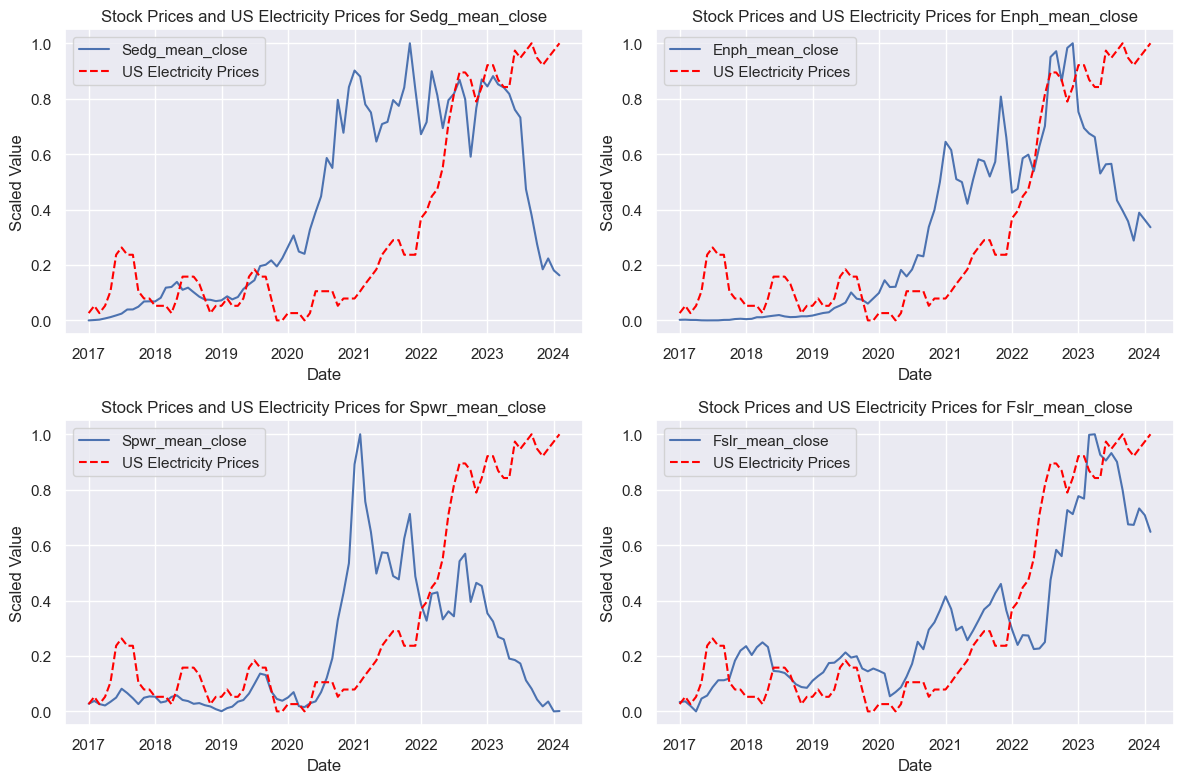

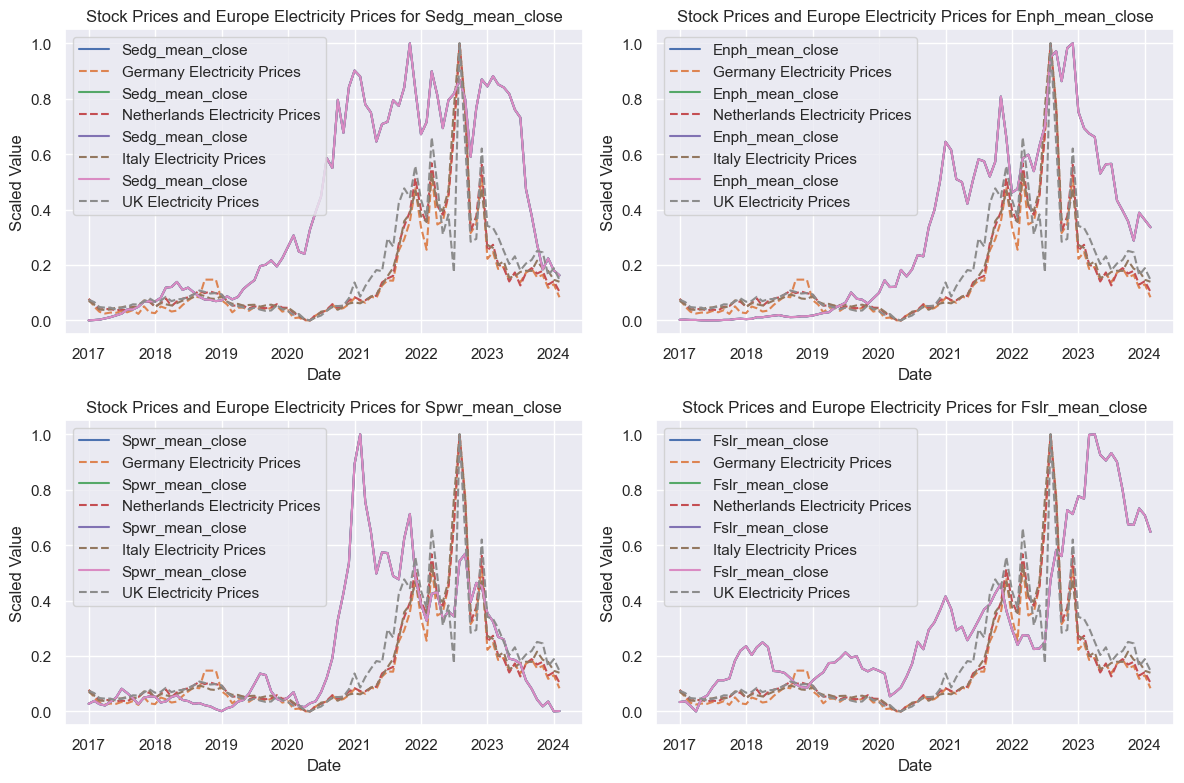

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Extract relevant columns from DataFrame
us_electricity_prices = df['US_Electricity_Price']
europe_electricity_prices = df[['Electricity_Price_Germany', 'Electricity_Price_Netherlands', 'Electricity_Price_Italy', 'Electricity_Price_UK']]
stock_prices = df[['Sedg_mean_close', 'Enph_mean_close', 'Spwr_mean_close', 'Fslr_mean_close']]

# Perform min-max scaling on the data
scaler = MinMaxScaler()
us_electricity_prices_scaled = scaler.fit_transform(us_electricity_prices.values.reshape(-1, 1)).flatten()
europe_electricity_prices_scaled = scaler.fit_transform(europe_electricity_prices)
stock_prices_scaled = scaler.fit_transform(stock_prices)

# Plot the relationship between US electricity prices and stock prices for each company using line plots
plt.figure(figsize=(12, 8))
for i, company in enumerate(stock_prices.columns):
    plt.subplot(2, 2, i+1)
    plt.plot(df['Date'], stock_prices_scaled[:, i], label=company)
    plt.plot(df['Date'], us_electricity_prices_scaled, label='US Electricity Prices', linestyle='--', color='red')
    plt.title(f'Stock Prices and US Electricity Prices for {company}')
    plt.xlabel('Date')
    plt.ylabel('Scaled Value')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot the relationship between Europe electricity prices and stock prices for each company using line plots
plt.figure(figsize=(12, 8))
for i, company in enumerate(stock_prices.columns):
    plt.subplot(2, 2, i+1)
    for j, country in enumerate(['Germany', 'Netherlands', 'Italy', 'UK']):
        plt.plot(df['Date'], stock_prices_scaled[:, i], label=company)
        plt.plot(df['Date'], europe_electricity_prices_scaled[:, j], label=f'{country} Electricity Prices', linestyle='--')
    plt.title(f'Stock Prices and Europe Electricity Prices for {company}')
    plt.xlabel('Date')
    plt.ylabel('Scaled Value')
    plt.legend()

plt.tight_layout()
plt.show()


In terms of the impact of electricity prices, we observe a divergence between the European and American markets. 

In Europe, there is a positive correlation between increasing electricity prices and rising company shares. We notice that the peaks in electricity prices and shares were reached approximately simultaneously in Enphase Energy and SolarEdge. Conversely, in the other two companies, the peak of high electricity prices occurred after the peak in share prices in SunPower and, in the case of First Solar, earlier.
This is explained by the fact that when the price of electricity rises, people switch to alternative energy sources.

As for the American market, there was also a positive relationship throughout the entire period. However, in the last year, we observed a negative correlation. As mentioned previously, electricity prices in the US were continue to rise, contrary to the trend in Europe.

During this last year, interest rates had a more pronounced impact on stock prices. Most people install solar panels on credit, but nominally interest rates in America are higher compared to Europe. Additionally, internal reforms within the US electricity system, such as Nem 3.0 in California, also played a significant role.

Let's explore energy commodity prices, their influence on one another, and their impact on stock prices.

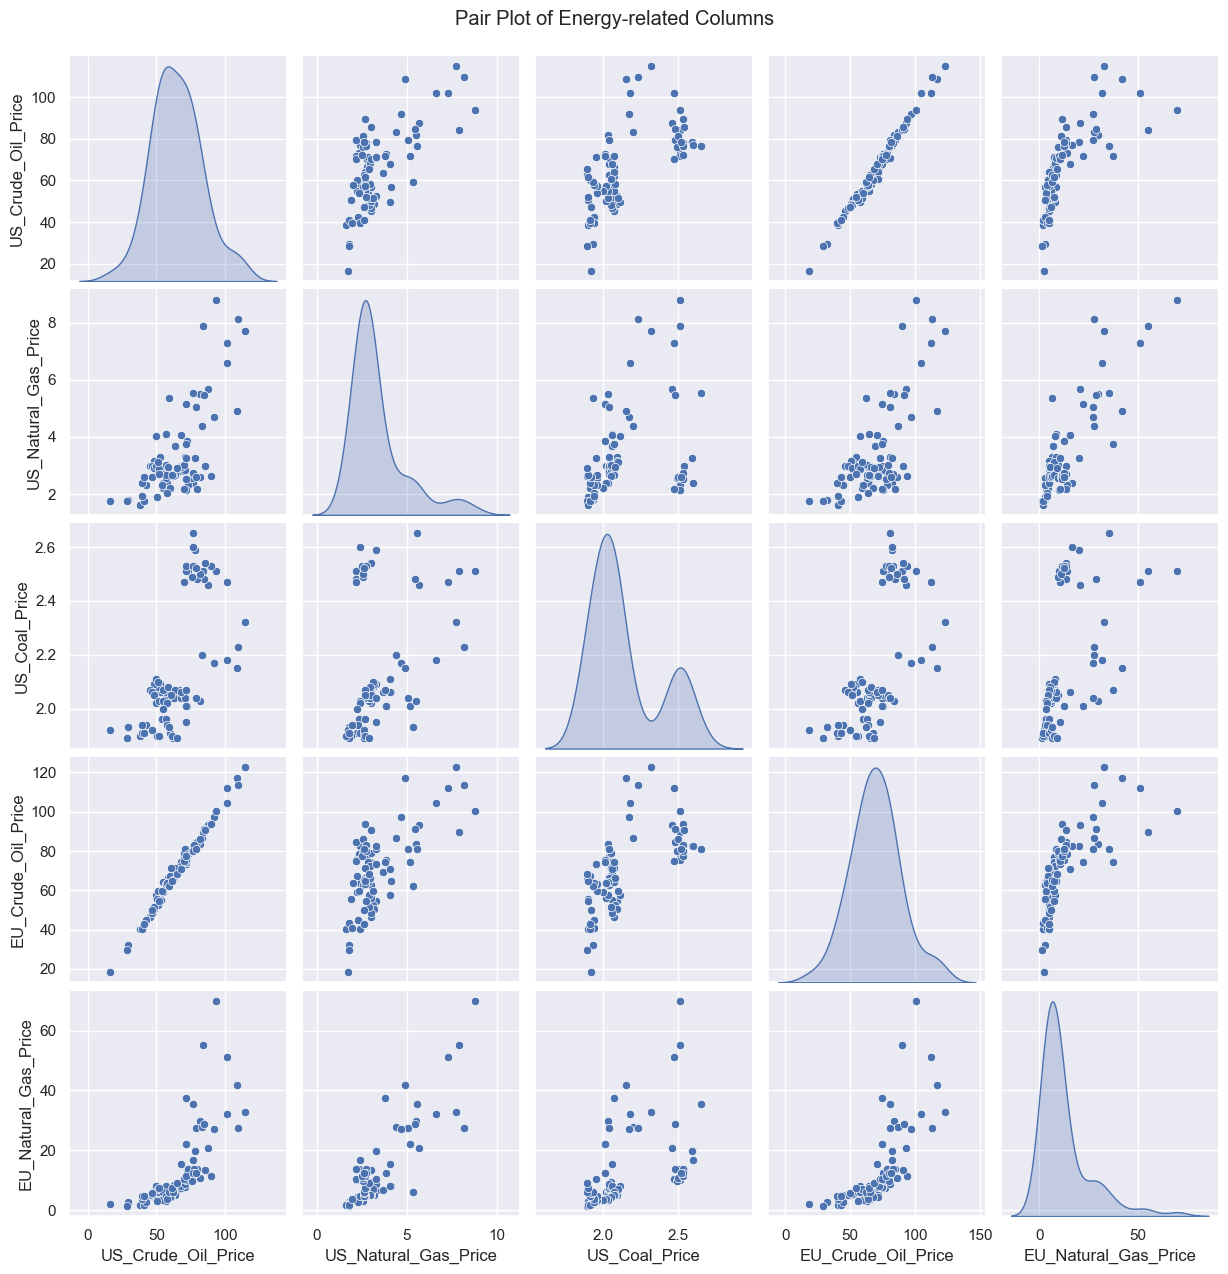

In [40]:
energy_columns = ['US_Crude_Oil_Price', 'US_Natural_Gas_Price',
                  'US_Coal_Price', 'EU_Crude_Oil_Price', 
                  'EU_Natural_Gas_Price']
# Pair plot for energy-related columns
sns.pairplot(df[energy_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Energy-related Columns', y=1.02)
# Customize axis labels
plt.xlabel('Energy Price')
plt.ylabel('Energy Price')
plt.show()

We can observe a linear regression relationship between US and European crude oil prices.
Additionally, positive relationships are visible in other energy commodities.
Overall, the markets are highly interconnected; when prices rise in Europe, they also rise in America, and vice versa.

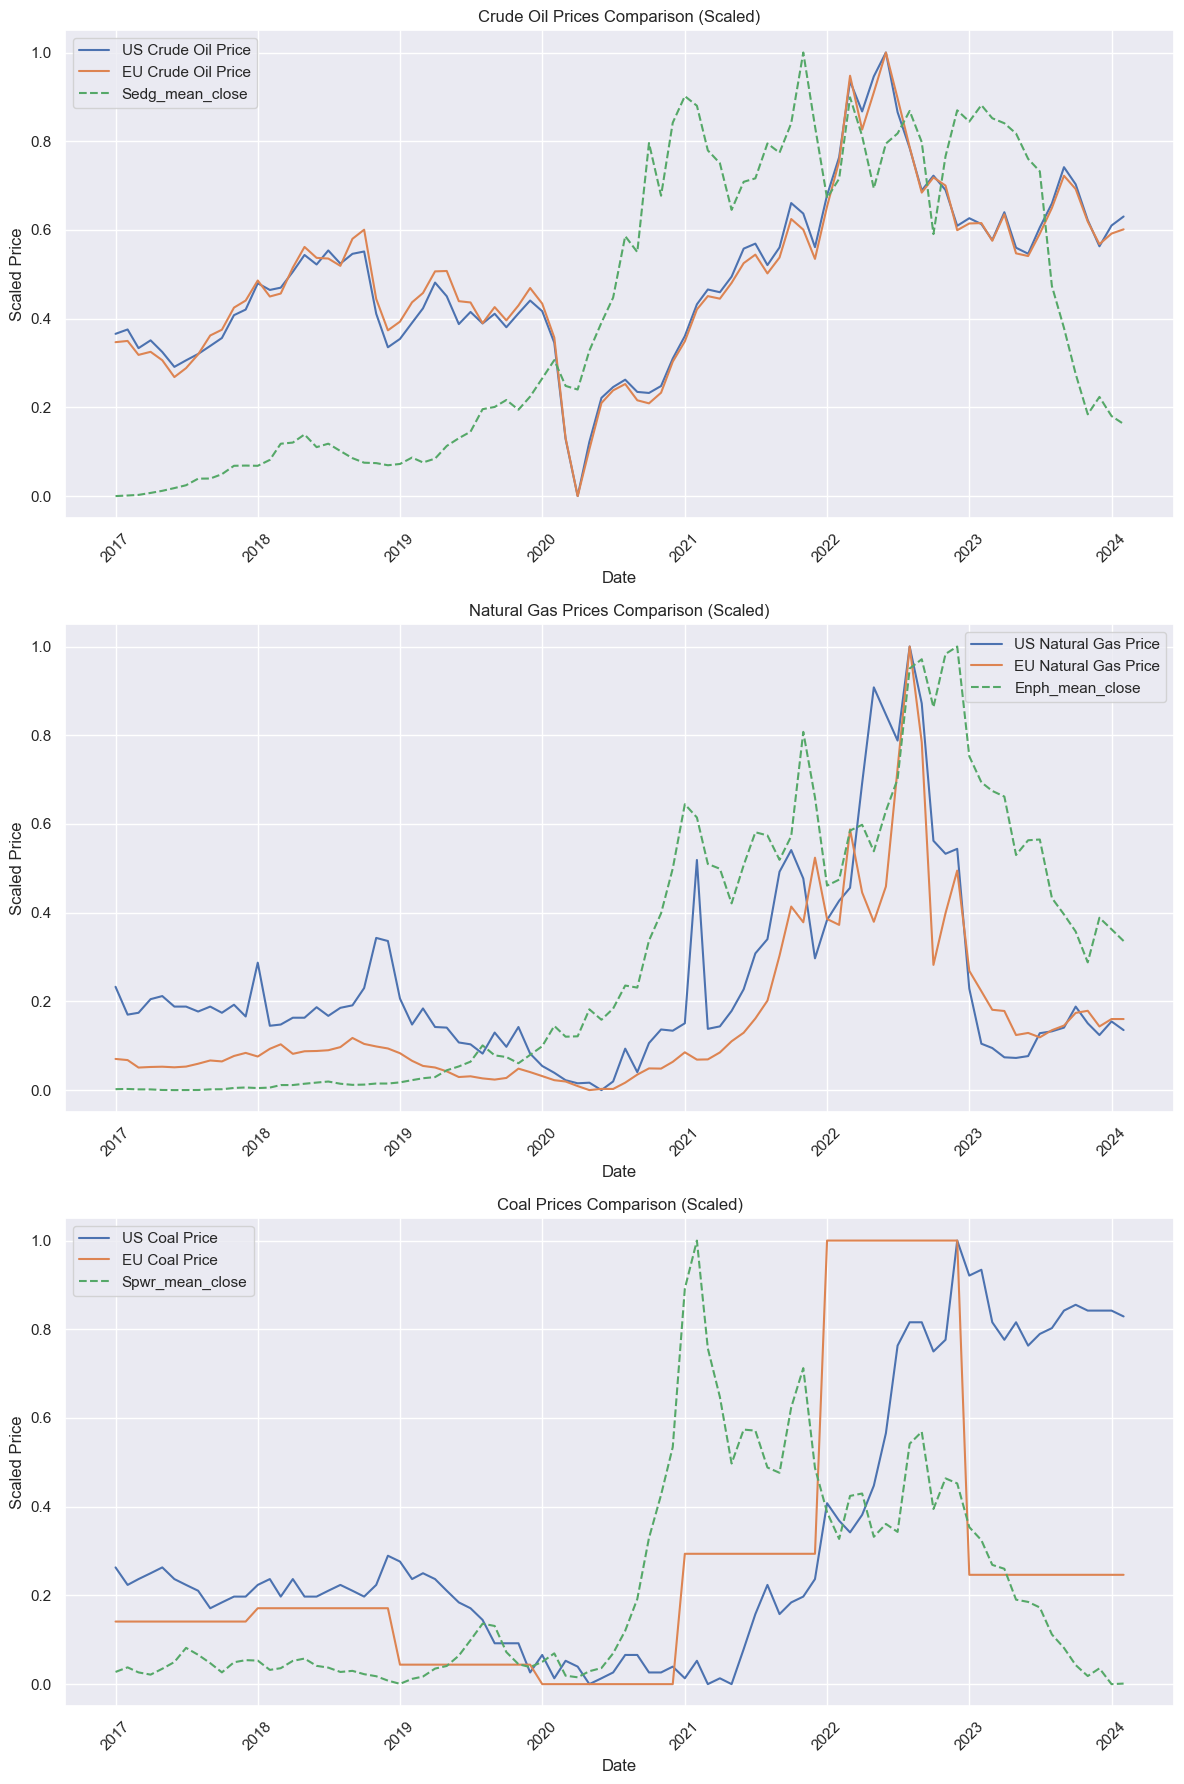

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Select price columns
price_columns = ['US_Crude_Oil_Price', 'EU_Crude_Oil_Price',
                 'US_Natural_Gas_Price', 'EU_Natural_Gas_Price',
                 'US_Coal_Price', 'EU_Coal_Price']

# Select stock price columns
stock_price_columns = ['Sedg_mean_close', 'Enph_mean_close', 'Spwr_mean_close', 'Fslr_mean_close']

# Scale price columns using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[price_columns] = scaler.fit_transform(df[price_columns])
df_scaled[stock_price_columns] = scaler.fit_transform(df[stock_price_columns])

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Crude oil prices subplot
axes[0].plot(df['Date'], df_scaled['US_Crude_Oil_Price'], label='US Crude Oil Price')
axes[0].plot(df['Date'], df_scaled['EU_Crude_Oil_Price'], label='EU Crude Oil Price')
axes[0].plot(df['Date'], df_scaled['Sedg_mean_close'], label='Sedg_mean_close', linestyle='--')
axes[0].set_title('Crude Oil Prices Comparison (Scaled)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Scaled Price')
axes[0].legend()
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Natural gas prices subplot
axes[1].plot(df['Date'], df_scaled['US_Natural_Gas_Price'], label='US Natural Gas Price')
axes[1].plot(df['Date'], df_scaled['EU_Natural_Gas_Price'], label='EU Natural Gas Price')
axes[1].plot(df['Date'], df_scaled['Enph_mean_close'], label='Enph_mean_close', linestyle='--')
axes[1].set_title('Natural Gas Prices Comparison (Scaled)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Scaled Price')
axes[1].legend()
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

# Coal prices subplot
axes[2].plot(df['Date'], df_scaled['US_Coal_Price'], label='US Coal Price')
axes[2].plot(df['Date'], df_scaled['EU_Coal_Price'], label='EU Coal Price')
axes[2].plot(df['Date'], df_scaled['Spwr_mean_close'], label='Spwr_mean_close', linestyle='--')
axes[2].set_title('Coal Prices Comparison (Scaled)')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Scaled Price')
axes[2].legend()
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


We can observe positive correlation between crude oil, natural gas, coal and stock prices.
The reasons for that is because this is a competitive energy prices: If the prices of traditional fossil fuels like crude oil, natural gas, and coal are high, solar energy becomes relatively more attractive as an alternative energy source. Higher prices for fossil fuels can make solar energy more economically viable for consumers and businesses, leading to increased demand for solar products and services. Also, this is substitute goods: Solar energy competes with traditional fossil fuels as a source of electricity generation.

Furthermore, investors often view solar energy companies as part of the broader energy sector. Changes in the prices of fossil fuels can impact investor sentiment towards renewable energy stocks, including those in the solar market.

As for coal, we observe a lower correlation. The reason for this is that there are far fewer power plants that operate on coal due to its significant air pollution. Its contribution to the cost of 1 kW of energy is much lower. However, coal does have a greater impact on the price of electricity, consequently affecting the price of solar energy.

Machine learning model

Let's frame our problem as a classification task, we'll predict whether the stock price will increase, decrease, or remain the same.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define a function to categorize the change in stock price
def categorize_change(change):
    if change > 0:
        return 1  # Increase
    elif change < 0:
        return -1  # Decrease
    else:
        return 0  # No change
    
# Apply the categorize_change function to create the target variable
df['Class'] = df['Sedg_mean_close'].diff().shift(-1).apply(categorize_change)


In [43]:
df.head()

,Date,US_Interest_Rate,EU_Interest_Rate,US_Electricity_Price,Electricity_Price_Germany,Electricity_Price_Netherlands,Electricity_Price_Italy,Electricity_Price_UK,US_Crude_Oil_Price,US_Natural_Gas_Price,...,Enph_mean_close,Spwr_mean_close,Fslr_mean_close,Quarter,Revenue_sedg,Gross_profit_sedg,Gross_margin_sedg,Operating_income_sedg,Net_income_sedg,Class
0,2017-01-01,0.65,-0.4,0.134,52.372957,50.765282,58.969758,52.855793,52.50,3.30,...,1.473500,4.584152,33.565000,Q1 -17,NaN,NaN,NaN,NaN,NaN,1
1,2017-02-01,0.66,-0.4,0.135,39.701607,43.062321,51.661265,49.185402,53.47,2.85,...,1.596842,4.984318,34.016316,Q1 -17,NaN,NaN,NaN,NaN,NaN,1
2,2017-03-01,0.79,-0.4,0.134,31.701386,34.527927,43.055747,41.921050,49.33,2.88,...,1.322174,4.542581,31.113913,Q1 -17,NaN,NaN,NaN,NaN,NaN,1
3,2017-04-01,0.90,-0.4,0.135,28.869917,35.365444,42.022514,41.070333,51.06,3.10,...,1.292105,4.347706,27.445789,Q2 -17,NaN,NaN,NaN,NaN,NaN,1
4,2017-05-01,0.91,-0.4,0.137,30.460511,35.062124,43.046304,41.106720,48.48,3.15,...,0.905000,4.861285,35.814545,Q2 -17,NaN,NaN,NaN,NaN,NaN,1


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Select features and target variable
interest_rate = ['US_Interest_Rate', 'EU_Interest_Rate']
electricity_prices = ['US_Electricity_Price', 'Electricity_Price_Germany',
                     'Electricity_Price_Netherlands', 'Electricity_Price_Italy', 'Electricity_Price_UK']
energy_commodity_prices = ['US_Crude_Oil_Price', 'US_Natural_Gas_Price', 'US_Coal_Price',
                           'EU_Crude_Oil_Price', 'EU_Natural_Gas_Price', 'EU_Coal_Price']
financial_metrics = ['Revenue_sedg', 'Gross_profit_sedg', 'Gross_margin_sedg',
                     'Operating_income_sedg', 'Net_income_sedg']

X = df[interest_rate + energy_commodity_prices + financial_metrics]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocess the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Preprocess the testing data
X_test_processed = preprocessor.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_processed)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.75      0.75      0.75         8
           1       0.80      0.80      0.80        10

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18

Accuracy: 0.7777777777777778


The classification report and accuracy score provide insights into the performance of the Random Forest classifier on your test set:

Precision: Precision measures the accuracy of positive predictions. For both classes (-1 and 1), the precision is decent, with class 1 having slightly higher precision. This indicates that when the model predicts a class label, it is correct around 75-80% of the time.

Recall: Recall, also known as sensitivity, measures the proportion of actual positives that are correctly identified by the model. Again, for both classes, the recall is similar, around 75-80%. This means the model is effectively capturing around 75-80% of the positive cases in the dataset.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. The F1-scores for both classes are around 0.75-0.80, indicating a good balance between precision and recall.

Support: Support indicates the number of actual occurrences of each class in the test set. It's useful to see if the dataset is balanced or if one class dominates over the other.

Accuracy: The overall accuracy of the model is around 77.8%, meaning that roughly 78% of the test set instances were correctly classified by the model.

Overall, the Random Forest classifier seems to perform reasonably well on this dataset.

Confusion Matrix:

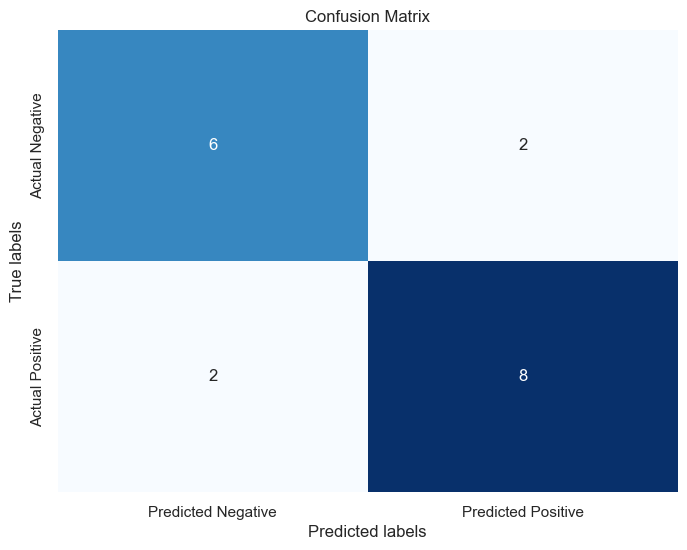

Confusion Matrix:
[[6 2]
 [2 8]]


In [45]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)

In the confusion matrix:

True Negative (TN): There are 6 instances that are truly labeled as -1 and predicted correctly as -1.
False Positive (FP): There are 2 instances that are actually -1 but predicted incorrectly as 1.
False Negative (FN): There are 2 instances that are actually 1 but predicted incorrectly as -1.
True Positive (TP): There are 8 instances that are truly labeled as 1 and predicted correctly as 1.
In summary:

The model correctly predicted 6 instances of class -1.
The model correctly predicted 8 instances of class 1.
The model incorrectly predicted 2 instances of class -1 as 1.
The model incorrectly predicted 2 instances of class 1 as -1.

About count of instances: 
There are 18 instances in total (as per the test set size, we have 86 monthes).
Class -1 has a true count of 8 (6 correct predictions, 2 incorrect predictions).
Class 1 has a true count of 10 (8 correct predictions, 2 incorrect predictions).

Feature Importance 

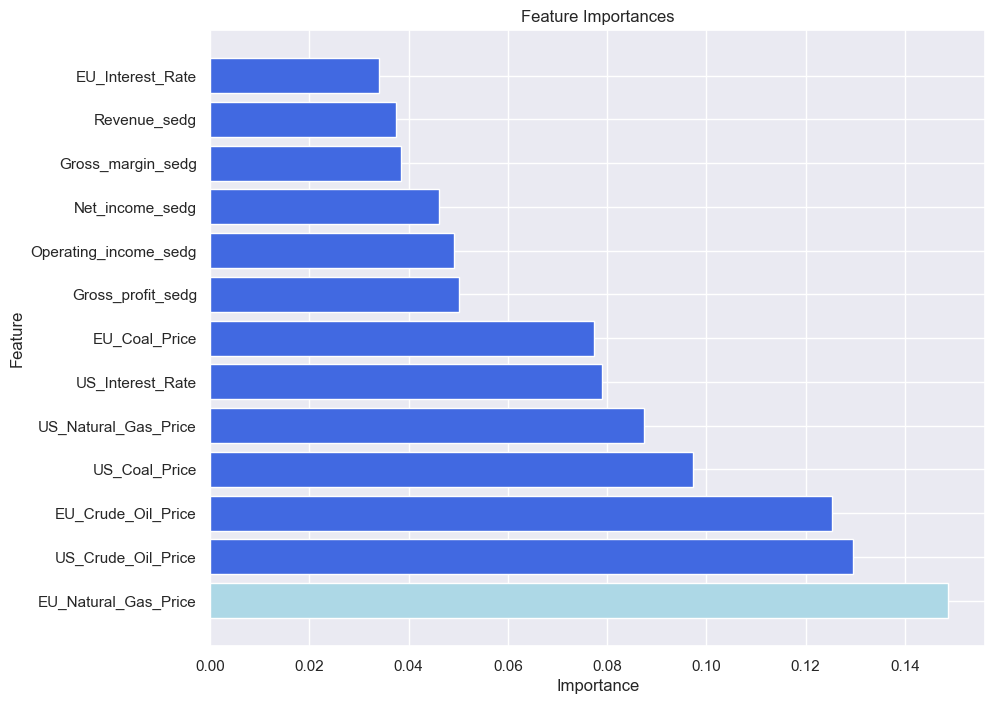

In [46]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Define colors for bars based on importance
colors = ['royalblue' if imp < 0.14 else 'lightblue' for imp in feature_importance_df['Importance']]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In the feature importance analysis of the model, we observe that natural gas has the most significant influence on stock prices. This is attributed to the Russian-Ukrainian conflict, as Europe had previously relied on Russian gas imports. Consequently, the conflict has had a substantial impact on natural gas prices and, subsequently, on stock prices.

Cross-Validation:

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Initialize SimpleImputer for imputing missing values
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the entire dataset
X_imputed = imputer.fit_transform(X)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_imputed, y, cv=kf)

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_scores, 1):
    print(f"Fold {i}: {accuracy:.4f}")
print(f"\nAverage Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Results:
Fold 1: 0.7778
Fold 2: 0.5294
Fold 3: 0.6471
Fold 4: 0.6471
Fold 5: 0.7059

Average Accuracy: 0.6614


The cross-validation scores vary across different folds, indicating variability in model performance when trained on different subsets of the data.
The average cross-validation score provides an overall estimate of the model's performance. In this case, the average score suggests that the model achieves an accuracy of approximately 66.14% on unseen data, on average, across the different folds.
It's important to note that cross-validation helps assess the generalization performance of the model and provides a more reliable estimate of its performance compared to a single train-test split.
Although the cross-validation scores suggests that the model's performance varies slightly across different folds, but overall, it achieves moderate accuracy in predicting the target variable.

Additional Metrics:

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Interpretation
print("\nInterpretation:")
print(f"Precision represents the proportion of positive identifications that were actually correct: {precision:.4f}")
print(f"Recall (Sensitivity) represents the proportion of actual positives that were correctly identified: {recall:.4f}")
print(f"F1-score is a balance between precision and recall: {f1:.4f}")


Precision: 0.8000
Recall: 0.8000
F1-score: 0.8000

Interpretation:
Precision represents the proportion of positive identifications that were actually correct: 0.8000
Recall (Sensitivity) represents the proportion of actual positives that were correctly identified: 0.8000
F1-score is a balance between precision and recall: 0.8000


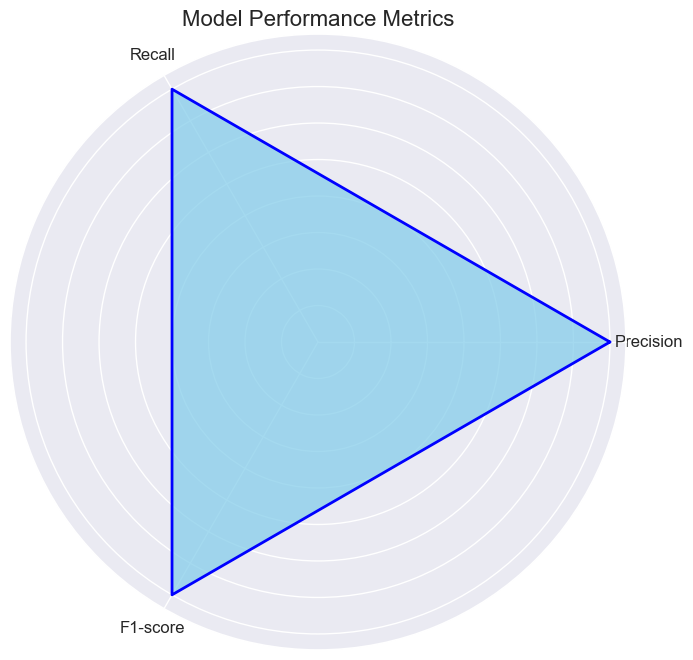

In [49]:
# Assuming y_test and y_pred are already defined
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Define categories and corresponding metric values
categories = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start value to the end.
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.5)
ax.plot(angles, values, color='blue', linewidth=2)

# Fill area with color
ax.fill(angles, values, color='skyblue', alpha=0.5)

# Set labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_title('Model Performance Metrics', fontsize=16)

plt.show()


Precision: 0.8000 means that 80% of the instances predicted as positive were actually correct.
Recall (Sensitivity): Also 0.8000, indicating that 80% of the actual positives were correctly identified by the model.
F1-score: 0.8000 represents the balance between precision and recall. It is the harmonic mean of precision and recall and gives an overall measure of the model's accuracy.
Having consistent scores across these metrics is a positive indication of the model's performance, suggesting it is making reliable predictions.

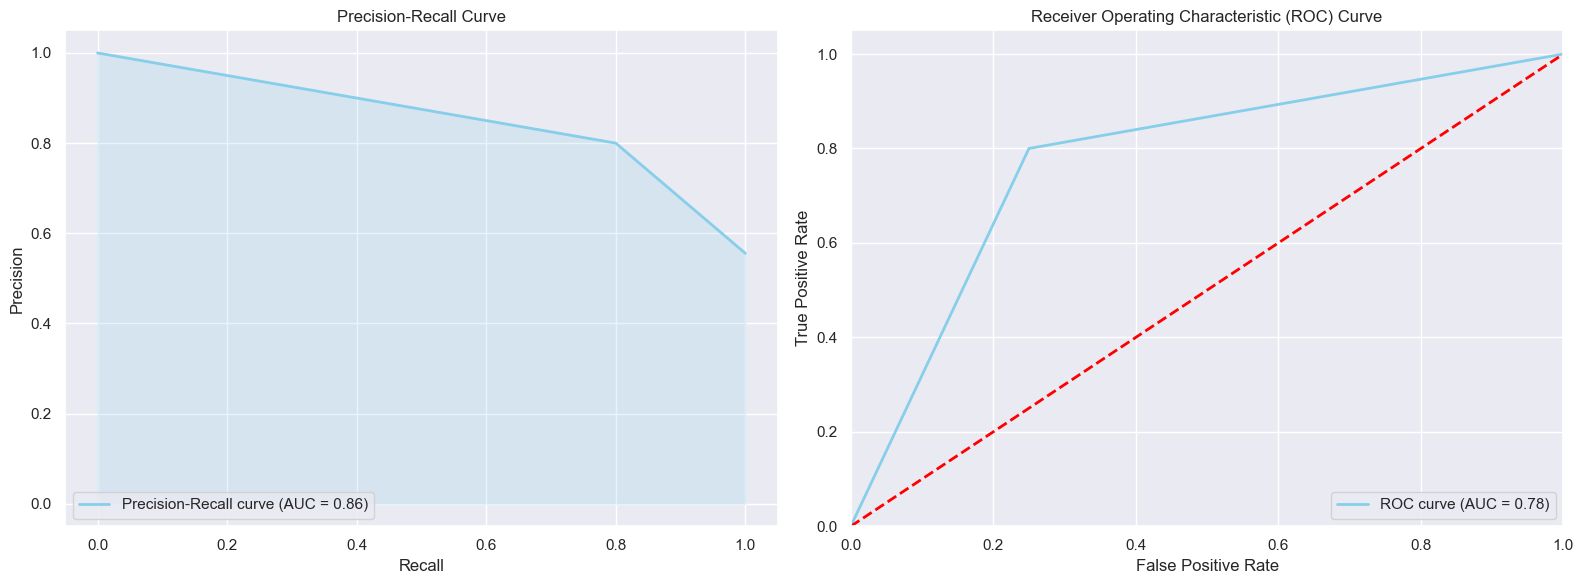

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate Precision-Recall AUC score
pr_auc = auc(recall, precision)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Precision-Recall curve
axes[0].plot(recall, precision, color='skyblue', lw=2, label='Precision-Recall curve (AUC = {:.2f})'.format(pr_auc))
axes[0].fill_between(recall, precision, color='skyblue', alpha=0.2)  # Fill area under curve with color
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision-Recall Curve')
axes[0].legend(loc='lower left')

# Plot ROC curve
axes[1].plot(fpr, tpr, color='skyblue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


Precision-Recall Curve (PR Curve) AUC = 0.86:

The Precision-Recall curve measures the trade-off between precision (positive predictive value) and recall (true positive rate) for different thresholds.
An AUC score of 0.86 indicates that the model achieves high precision while maintaining a good recall across various threshold values.
It suggests that the model performs well in correctly identifying positive instances while minimizing false positives.

ROC Curve AUC = 0.78:

The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) for different threshold values.
An AUC score of 0.78 suggests that the model has good discriminatory power in distinguishing between the positive and negative classes.
However, it may not perform as well as the PR curve in scenarios where class imbalance is present, as it may prioritize minimizing false positives over maximizing true positives.
Overall, both curves provide valuable insights into the model's performance, with the Precision-Recall curve indicating strong precision-recall trade-off and the ROC curve reflecting good discriminatory power.

Conclusions 

In this comprehensive project, we conducted a thorough analysis of the solar energy sector, focusing on key companies SolarEdge, Enphase Energy, SunPower, and First Solar. Our investigation encompassed various aspects, including stock price prediction, financial statement analysis, market dynamics, and the influence of macroeconomic factors on stock performance. Through the integration of diverse methodologies and data sources, we aimed to gain insights into the complexities of the solar industry and provide actionable information for investors, policymakers, and stakeholders.

In conclusion, our analysis of the solar energy sector, focusing on key companies SolarEdge, Enphase Energy, SunPower, and First Solar, revealed several important insights. Despite a notable upsurge in the industry following the onset of the Coronavirus pandemic, subsequent years saw a downturn, notably evident in the last year (2023) and extending into the present period (February 2024). This decline impacted the entire industry rather than specific companies, emphasizing the importance of understanding broader market dynamics and external influences.

We observed a surge in trading volume during the period of falling stock prices, suggesting potential factors such as panic selling, shifts in market sentiment, technical signals, corporate events, and profit-taking. Notably, specific events such as Solaredge leaving the S&P 500 index contributed to significant volume spikes. Our analysis of moving averages indicated that shorter-term moving averages (10 and 20 days) are more suitable for identifying meaningful patterns and trends in stock prices.

Additionally, our examination of daily returns highlighted insights into volatility, trends, outliers, and correlations among the companies. Strong positive correlations in stock returns and closing prices were observed across all four companies, with some variations in correlation strength between specific pairs.

These findings underscore the complexity of the solar energy market and the interconnectedness of various factors influencing stock prices. Understanding these dynamics is essential for making informed decisions in the solar industry and navigating market fluctuations effectively.

In the Solaredge stock price prediction, we utilized linear regression and random forest models to forecast stock prices. Linear regression, chosen due to its interpretability and assumption of a linear relationship between features and the target variable, exhibited promising results. However, to account for nonlinear relationships and complex patterns in the data, we also employed a random forest model.
The results demonstrated exceptional predictive accuracy, as evidenced by low error metrics and a high R-squared score. Visual assessments affirmed the model's effectiveness in closely aligning predicted and actual close prices of Solaredge stock over time, underscoring its reliability for forecasting future stock movements. These results demonstrate the effectiveness of linear regression model. However,in the continuation of the project we will apply also random forest model.

In analyzing SolarEdge's financial statements, we observed significant declines across key metrics during the third quarter (Q3). From profitability to efficiency, liquidity, debt management, and earnings per share, the company faced challenges, evident in decreasing revenues, profitability margins, and operational efficiencies. Notably, this decline coincided with a downturn in the company's stock prices, suggesting a strong correlation between financial health and market performance. Our findings emphasize the importance of monitoring financial metrics for assessing performance and predicting stock behavior.


Incorporating additional metrics such as interest rates, electricity rates, and prices for crude oil, natural gas, and coal into the analysis provides a comprehensive understanding of the factors influencing the solar industry. By focusing on key markets where our companies operate, namely the USA and Europe, we can assess how variations in these metrics impact stock prices.

Electricity prices, obtained separately for each country, allow us to examine market dynamics in the Netherlands, Germany, Italy, and the United Kingdom, where our companies have significant presence.

Compiling a dataset encompassing these metrics enables us to conduct a thorough analysis to identify correlations and potential causal relationships between these variables and stock prices. By exploring the interplay between energy prices, interest rates, and other macroeconomic factors, we can gain valuable insights into the drivers of stock market fluctuations in the solar industry.

This holistic approach to data analysis will provide actionable information for investors, policymakers, and stakeholders, helping them make informed decisions in a rapidly evolving energy landscape.


Observing the plot depicting the change in interest rates over time for both the United States and the European Union, we notice a strong positive relationship between interest rates in both markets, with the nominal US interest rate consistently higher than that of the EU.

Similarly, analyzing electricity prices reveals distinct trends between the US and Europe, with the former experiencing a continued rise while the latter saw a decline in recent years. These variations likely stem from regional differences in energy policies and market dynamics.

Examining energy commodity prices, such as crude oil, natural gas, and coal, highlights their interconnectedness across regions. We observe similar trends between the US and Europe, indicating a global market influence on these commodities.

Further delving into the relationship between these metrics and stock prices, we identify significant correlations. For instance, rising interest rates tend to correlate with falling stock prices, while electricity price fluctuations impact stock prices differently in Europe compared to the US.

Moreover, the positive correlation between energy commodity prices and stock prices underscores the influence of energy market dynamics on investor sentiment and stock performance within the solar industry.

Implementing a Random Forest model enables us to predict stock price movements based on these metrics, with reasonable accuracy and precision. The model's performance metrics, including precision, recall, F1-score, and AUC, provide insights into its reliability and effectiveness in capturing stock price trends.

Overall, integrating these additional metrics and employing advanced modeling techniques enhances our ability to analyze and predict stock market behavior within the solar industry, aiding investors, policymakers, and stakeholders in making informed decisions amidst evolving market dynamics.

In addition to summarizing the project's key findings and methodologies, it is imperative to consider future directions for research and analysis within the renewable energy sector. Exploring the impact of emerging technologies, policy changes, global events, and ESG factors on market dynamics and stock performance, alongside assessing long-term sustainability and growth prospects, presents promising avenues for further investigation. By incorporating these forward-looking perspectives, we can enhance our understanding of the evolving landscape and better inform strategic decision-making in the renewable energy industry.